In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [57]:
# write your code for task 0 here
df = pd.read_csv("../data/adult.csv")

df.drop("Unnamed: 0", inplace=True, axis=1)

# remove rows with symbol '?'
df = df[df.apply(lambda x: "?" not in x.values, axis=1)]

# make column 'salary' categorical
df["salary"] = pd.Categorical(df["salary"])
df["salary"]

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: salary, Length: 30162, dtype: category
Categories (2, object): ['<=50K', '>50K']

# Task 1
Print the count of men and women in the dataset.

In [43]:
# write your code for task 1 here
df["sex"].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [4]:
# write your code for task 2 here
df[df["sex"] == "Male"]["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [12]:
# write your code for task 3 hereb
per = df["native-country"].value_counts(normalize=True) * 100
per["Poland"]

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [13]:
# write your code for task 4 here
less_fifty = df[df["salary"] == "<=50K"]

less_fifty["age"].mean(), less_fifty["age"].std()

(36.60806038668668, 13.464631257161633)

In [15]:
more_fifty = df[df["salary"] == ">50K"]

more_fifty["age"].mean(), more_fifty["age"].std()

(43.95911028236548, 10.269632835673852)

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [24]:
# write your code for task 5 here
higher_ed = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
df[(~df["education"].isin(higher_ed)) & (df["salary"] == "<=50K")].iloc[:, 0].count()

17081

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [28]:
# write your code for task 6 here
df.groupby(df["education"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

<BarContainer object of 2 artists>

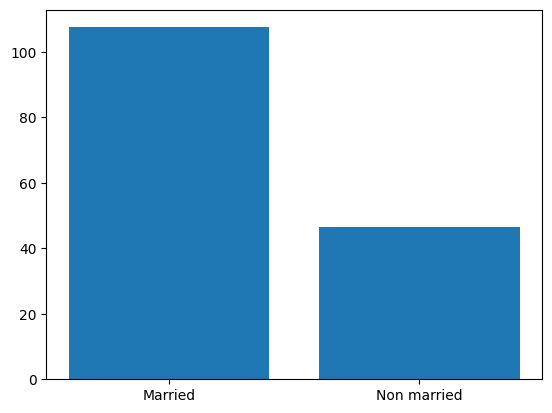

In [22]:
# write your code for task 7 here
# get men who earns more 50 >
males = df[(df["sex"] == "Male")]

# all maried men
married_men = males[males["marital-status"].str.startswith("Married")]
# all unmarried men
non_married_men = males[~males["marital-status"].str.startswith("Married")]

average_salary_married = married_men["salary K$"].mean()
average_salary_non_married = non_married_men["salary K$"].mean()

plt.bar(["Married", "Non married"], [average_salary_married, average_salary_non_married])

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [32]:
# write your code for task 8 here
# get the max working hours of some person
max_hour_per_week = df["hours-per-week"].max()
# get the number of people working themax working hours 
len(df[df["hours-per-week"] == max_hour_per_week])

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   workclass       30162 non-null  object  
 2   education       30162 non-null  object  
 3   marital-status  30162 non-null  object  
 4   occupation      30162 non-null  object  
 5   relationship    30162 non-null  object  
 6   race            30162 non-null  object  
 7   sex             30162 non-null  object  
 8   hours-per-week  30162 non-null  int64   
 9   native-country  30162 non-null  object  
 10  salary          30162 non-null  category
 11  salary K$       30162 non-null  int64   
dtypes: category(1), int64(3), object(8)
memory usage: 2.8+ MB


In [60]:
non_numeric_columns = df.select_dtypes(exclude=["int64"]).columns

# convert it to category to get numerical value
for column in non_numeric_columns:
    df[column] = df[column].astype("category").cat.codes

df.corr()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
age,1.000000,0.080540,-0.001111,-0.276373,-0.005682,-0.246456,0.023374,0.081993,0.101599,-0.001905,0.241998,0.208203
workclass,0.080540,1.000000,0.017855,-0.034241,0.015572,-0.067417,0.044731,0.074973,0.050724,0.007668,0.018044,0.009948
education,-0.001111,0.017855,1.000000,-0.040664,-0.038212,-0.012717,0.011154,-0.027888,0.059887,0.078790,0.078987,0.067737
marital-status,-0.276373,-0.034241,-0.040664,1.000000,0.022655,0.177964,-0.068627,-0.119813,-0.189003,-0.025902,-0.193518,-0.165185
occupation,-0.005682,0.015572,-0.038212,0.022655,1.000000,-0.053727,0.000717,0.062313,0.018365,-0.003483,0.051577,0.035984
relationship,-0.246456,-0.067417,-0.012717,0.177964,-0.053727,1.000000,-0.117143,-0.584876,-0.257850,-0.010809,-0.251003,-0.210894
race,0.023374,0.044731,0.011154,-0.068627,0.000717,-0.117143,1.000000,0.089186,0.048532,0.124514,0.071658,0.060497
sex,0.081993,0.074973,-0.027888,-0.119813,0.062313,-0.584876,0.089186,1.000000,0.231268,0.000618,0.216699,0.182642
hours-per-week,0.101599,0.050724,0.059887,-0.189003,0.018365,-0.257850,0.048532,0.231268,1.000000,0.008408,0.229480,0.196378
native-country,-0.001905,0.007668,0.078790,-0.025902,-0.003483,-0.010809,0.124514,0.000618,0.008408,1.000000,0.023268,0.019605


Age and Marital Status: There is a moderate negative correlation (-0.276373) between age and marital status. This suggests that older individuals are less likely to be single and more likely to be married or in a committed relationship.

Age and Relationship: Similarly, there is a moderate negative correlation (-0.246456) between age and relationship status. This implies that as age increases, individuals are less likely to be in a non-family relationship.

Relationship and Sex: There is a strong negative correlation (-0.584876) between relationship status and sex. This indicates that being in a relationship is strongly associated with being male.